<center>
    
# Python For Quantum Mechanics
# Week 6: Linear Algebra

</center>

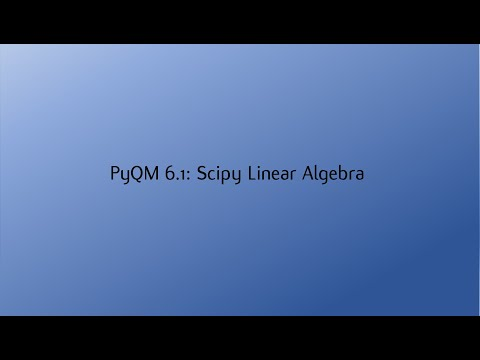

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('EQWi8rliCqY',width=700, height=400)

In [6]:
import numpy as np
import numpy.random as rnd

import scipy
import scipy.linalg as linalg
from scipy import stats

import matplotlib.pyplot as plt

You may be wondering why we are diving into another linear algebra library considering we have already studied `numpy.linalg`. Simply put, `scipy.linalg` contains everything that `numpy.linalg` does but offers additional functionality. It is used in conjuction with numpy ndarrays. 

## Linear Systems

We can use `scipy.linalg.solve()` to solve, for $\bf{x}$, linear systems of the form
$$ A x = b $$
where $A$ is a matrix, $x$ and $b$ are vectors.

In [7]:
A = np.array([[1,0,2],[0,1,2],[2,1,0]])
b = np.array([[6],[12],[18]])

x = linalg.solve(A, b)


print('A = ',A,'\n')
print('b = ',b,'\n')
print('x = ', x)

A =  [[1 0 2]
 [0 1 2]
 [2 1 0]] 

b =  [[ 6]
 [12]
 [18]] 

x =  [[ 4.]
 [10.]
 [ 1.]]


We can can also solve systems of the form 

$$ A X = B $$

where $A$, $X$, and $B$ are all matrices.

A =  [[1 0 2]
 [0 1 2]
 [2 1 0]] 

b =  [[6, 3, -6], [12, 6, -12], [18, 36, -18]] 

x =  [[  4.  11.  -4.]
 [ 10.  14. -10.]
 [  1.  -4.  -1.]]


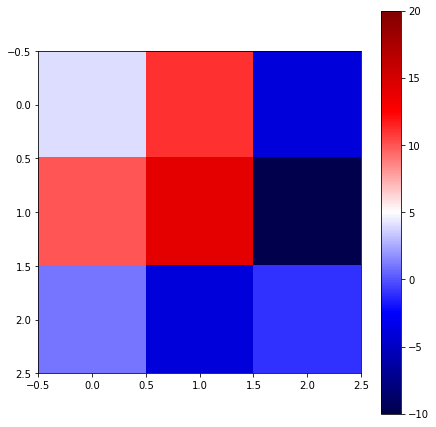

In [8]:
A = np.array([[1,0,2],[0,1,2],[2,1,0]])
B = [[6,3,-6],[12,6,-12],[18,36,-18]]

X = linalg.solve(A, B)

print('A = ',A,'\n')
print('b = ',B,'\n')
print('x = ', X)

fig = plt.figure(figsize = (7,7))
ax = fig.add_axes([.1,.1,.8,.8])

im = ax.imshow(X, cmap='seismic')
fig.colorbar(im, ax=ax)
im.set_clim(vmin=-10, vmax=20)

plt.show()

## Matrix Functions

The function `scipy.linalg.inv(A)` computes the inverse of a matrix `A`.

In [9]:
A = rnd.random((3,3))
print('A = ', A,'\n')

print('A^-1 = ',linalg.inv(A))

A =  [[0.90793703 0.02559281 0.5592616 ]
 [0.87148729 0.78115408 0.52119322]
 [0.96424101 0.62373748 0.30683951]] 

A^-1 =  [[ 0.45241273 -1.80638908  2.24371588]
 [-1.24573705  1.38094825 -0.07511405]
 [ 1.11060663  2.8693999  -3.63913836]]


The function `scipy.linalg.det(A)` computes the determinant of a matrix `A`.

In [10]:
print('det(A) = ',linalg.det(A))

det(A) =  -0.18876306479783114


Another function, `scipy.linalg.norm(A, ord=2)` computes the modulus of order `ord`. If `ord` $=$ `np.inf`, then the maximum value in $A$ is given. If `ord` $=$ `-np.inf`, then the minimum value in `A` is given.

In [11]:
A = np.array([4,3,1,2,2,1,1])

print('norm(A,ord=1) = 4 + 3 + 1 + 2 + 2 + 1 + 1 = ',linalg.norm(A, ord=1))
print('norm(A,ord=2) = (4**2 + 3**2 + 1**2 + 2**2 + 2**2 + 1**2 + 1**2)**(1/2) = ',linalg.norm(A))
print('norm(A,ord=3) = (4**3 + 3**3 + 1**3 + 2**3 + 2**3 + 1**3 + 1**3)**(1/3) = ',linalg.norm(A, ord=3))
print('norm(A,ord=-np.inf) = ',linalg.norm(A, ord=-np.inf))
print('norm(A,ord=np.inf) = ',linalg.norm(A, ord=np.inf))

norm(A,ord=1) = 4 + 3 + 1 + 2 + 2 + 1 + 1 =  14.0
norm(A,ord=2) = (4**2 + 3**2 + 1**2 + 2**2 + 2**2 + 1**2 + 1**2)**(1/2) =  6.0
norm(A,ord=3) = (4**3 + 3**3 + 1**3 + 2**3 + 2**3 + 1**3 + 1**3)**(1/3) =  4.791419857062784
norm(A,ord=-np.inf) =  1.0
norm(A,ord=np.inf) =  4.0


## Spectral Decomposition

We can represent a matrix in terms of it's eigenvectors and eigenvalues, or in other words, perform a spectral decomposition; `scipy.linalg.eig(A)` can be used to achive this by computing the eigenvalues and eigenvectors of `A`, giving a tuple.

In [22]:
A = rnd.random((3,3))

eigval, eigvec = linalg.eig(A)

print('Eigenvalues = ',eigval, '\n')
print('Eigenvector Matrix = ',eigvec, '\n')

print('First Eigenvector = ',eigvec[:,0], '\n')

Eigenvalues =  [ 1.35389788+0.j        -0.04622396+0.2803132j -0.04622396-0.2803132j] 

Eigenvector Matrix =  [[ 0.68257443+0.j          0.75080429+0.j          0.75080429-0.j        ]
 [ 0.71906777+0.j         -0.48821975-0.19373787j -0.48821975+0.19373787j]
 [ 0.13051318+0.j         -0.0674027 +0.39478716j -0.0674027 -0.39478716j]] 

First Eigenvector =  [0.68257443+0.j 0.71906777+0.j 0.13051318+0.j] 



## Special Matrices

Scipy supports the creation of special matrices that are commonly used. A full list can be found at https://docs.scipy.org/doc/scipy/reference/tutorial/linalg.html. 

For example, we can create a Hadamard matrix of order `n` using `scipy.linalg.hadamard(n)`. The integer `n` must be a power of $2$.

In [25]:
H = linalg.hadamard(n=2)

print(H)

[[ 1  1]
 [ 1 -1]]


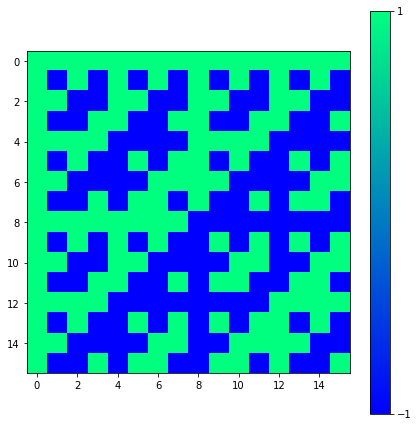

In [34]:
H = linalg.hadamard(n=2**4)

fig = plt.figure(figsize = (7,7))
ax = fig.add_axes([.1,.1,.8,.8])

im = ax.imshow(H, cmap='winter')
fig.colorbar(im, ticks=[-1,1])

plt.show()

## Sparse Matrix

A sparse matrix (loosely defined) is a matrix with a many zero elements. When dealing with large sparse matrices it is extrememly useful to take advantage of their sparseness and the memory requirements, speeding-up our code. To convert from a memory dense matrix to a memory sparse matrix we use `scipy.sparse.csr_matrix(A)`.

In [35]:
A = np.array([[0,0,1],[2,0,0],[0,3,0]])
print(A,'\n')

A = scipy.sparse.csr_matrix(A)
print(type(A),'\n')
print(A)

[[0 0 1]
 [2 0 0]
 [0 3 0]] 

<class 'scipy.sparse.csr.csr_matrix'> 

  (0, 2)	1
  (1, 0)	2
  (2, 1)	3


Notice that each tuple corrseonds to the element location. We can conceivably represent any matrix in this form, but clearly this would be less efficient for non-sparse matrices. We can perform the standard matrix operations with sparse matrices as shown below. To convert back to a dense matrix, we use the `A.todense()`.

In [39]:
print(A.todense(),'\n')

print((A+A).todense(),'\n')

print((A*A).todense(),'\n')

print((A.dot(A)).todense(),'\n')

print(A, '\n')

vec = np.array([[1],[2],[3]])

print((A*vec))

[[0 0 1]
 [2 0 0]
 [0 3 0]] 

[[0 0 2]
 [4 0 0]
 [0 6 0]] 

[[0 3 0]
 [0 0 2]
 [6 0 0]] 

[[0 3 0]
 [0 0 2]
 [6 0 0]] 

  (0, 2)	1
  (1, 0)	2
  (2, 1)	3 

[[3]
 [2]
 [6]]


It is also useful to initialise an empty sparse matrix and then populate it with non-zero elements with `scipy.sparse.lil_matrix((n,m))`. This saves us from creating a very large matrix with many zeros in the first place.

In [43]:
A = scipy.sparse.lil_matrix((3,3)) #Empty 3x3 sparse matrix

A[0,0] = 1
A[0,1] = 2
A[2,0] = 7
A[2,2] = 1


print(A,'\n')
print(A.todense())

  (0, 0)	1.0
  (0, 1)	2.0
  (2, 0)	7.0
  (2, 2)	1.0 

[[1. 2. 0.]
 [0. 0. 0.]
 [7. 0. 1.]]


## Matrix Exponential

The matrix exponential of a matrix $A$ is written as

$$ \exp (A) = e^{A} = \sum_{k=0}^{\infty} \frac{1}{k!}A^k . $$

This seems like a monumental task but it can easily be achieved with `scipy.linalg.expm(A)`.

In [3]:
n=4
A = (1/np.sqrt(n))*linalg.hadamard(n)
print(A,'\n')

expA = linalg.expm(A)

print(expA,'\n')

[[ 0.5  0.5  0.5  0.5]
 [ 0.5 -0.5  0.5 -0.5]
 [ 0.5  0.5 -0.5 -0.5]
 [ 0.5 -0.5 -0.5  0.5]] 

[[ 2.13068123  0.5876006   0.5876006   0.5876006 ]
 [ 0.5876006   0.95548004  0.5876006  -0.5876006 ]
 [ 0.5876006   0.5876006   0.95548004 -0.5876006 ]
 [ 0.5876006  -0.5876006  -0.5876006   2.13068123]] 



Also we can verify that 
$$ \exp \left(A^T\right) = \exp \left(A\right)^T $$
and
$$ \exp \left(A^\dagger \right) = \exp \left(A \right)^\dagger $$
up to a computational error.

In [5]:
A = rnd.random((n,n)) + 1j*rnd.random((n,n))

Q = np.round(linalg.expm(A).T,3) == np.round(linalg.expm(A.T),3)
print(Q,'\n')

Q = np.round((np.matrix(linalg.expm(A))).H,3) == np.round(linalg.expm(np.matrix(A).H),3)
print(Q,'\n')

[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]] 

[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]] 



One key point with matrices is that if $A$ and $B$ do not commute,
$$AB \neq BA \iff [A,B]= AB -BA \neq0.$$
then
$$ e^A e^B \neq e^{A+B}.$$

But if 
$$[A,B]= AB -BA =0$$
then
$$e^Ae^B = e^{A+B}. $$

In [62]:
A = np.array([[0,1],[0,0]])
B = np.eye(2)
# These matrices commute

EA = linalg.expm(A)@linalg.expm(B) == linalg.expm(A+B)
print(EA,'\n')

A = np.array([[0,1],[0,0]])
B = np.array([[0,1],[1,0]])
# These matrices do not commute

EA = linalg.expm(A)@linalg.expm(B) == linalg.expm(A+B)
print(EA,'\n')

[[ True  True]
 [ True  True]] 

[[False False]
 [False False]] 



## Unitary Matrix

A Unitary Matrix is defined as a matrix that satisfies the following equation,
$$AA^{\dagger} =  A^{\dagger}A = \mathbb{1}$$
where $\mathbb{1}$ is the identity matrix. In other words the Hermitian conjugate of the matrix is it's multiplicative inverse,
$$A^{-1} = A^\dagger$$
The Hadamard gate is unitary as we see below.

In [63]:
n=4
A = (1/np.sqrt(n))*linalg.hadamard(n)
print(A,'\n')
A = np.matrix(A)

print(A*A.H==A.H*A,'\n')

print(A*A.H,'\n')

[[ 0.5  0.5  0.5  0.5]
 [ 0.5 -0.5  0.5 -0.5]
 [ 0.5  0.5 -0.5 -0.5]
 [ 0.5 -0.5 -0.5  0.5]] 

[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]] 

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]] 



We can also generate a random unitary matrix, of dimension `n`, using `scipy.stats.unitary_group.rvs(n)`.

In [64]:
U = stats.unitary_group.rvs(n)

print(np.round(np.dot(U,U.conj().T)),'\n')

U = np.matrix(U)

print(np.round(U,3),'\n')

print(np.round(U.H*U))

[[ 1.+0.j  0.-0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j -0.+0.j  0.-0.j]
 [ 0.-0.j -0.-0.j  1.+0.j  0.+0.j]
 [ 0.-0.j  0.+0.j  0.-0.j  1.+0.j]] 

[[ 0.038+0.194j  0.672+0.188j -0.314+0.106j -0.338+0.501j]
 [-0.653-0.313j  0.144+0.286j  0.472+0.305j  0.137+0.194j]
 [ 0.154-0.329j -0.142+0.047j  0.207-0.683j  0.024+0.58j ]
 [ 0.439-0.334j  0.564+0.265j  0.227-0.118j  0.257-0.42j ]] 

[[ 1.+0.j  0.+0.j -0.+0.j -0.+0.j]
 [ 0.-0.j  1.+0.j  0.+0.j  0.+0.j]
 [-0.+0.j  0.-0.j  1.+0.j -0.+0.j]
 [-0.-0.j  0.-0.j -0.-0.j  1.+0.j]]


## Tensor Product

In the function `scipy.sparse.kron(A,B)` the matrices/vectors `A` and `B` can be sparse or dense. The tensor product is computed as a sparse matrix. The tensor product of two $2\times2$ matrices $A$ and $B$ is as follows

$$ A = 
\begin{pmatrix}
a_{11} & a_{12} \\ 
a_{21} & a_{22}
\end{pmatrix}, 
\ \ \ \ 
B = 
\begin{pmatrix}
b_{11} & b_{12} \\ 
b_{21} & b_{22}
\end{pmatrix},$$

$$ A \otimes B = 
\begin{pmatrix}
a_{11} B & a_{12} B \\ 
a_{21} B & a_{22} B
\end{pmatrix} = 
\begin{pmatrix}
a_{11} \begin{pmatrix}
b_{11} & b_{12} \\ 
b_{21} & b_{22}
\end{pmatrix} & a_{12} \begin{pmatrix}
b_{11} & b_{12} \\ 
b_{21} & b_{22}
\end{pmatrix} \\ 
a_{21} \begin{pmatrix}
b_{11} & b_{12} \\ 
b_{21} & b_{22}
\end{pmatrix} & a_{22} \begin{pmatrix}
b_{11} & b_{12} \\ 
b_{21} & b_{22}
\end{pmatrix}
\end{pmatrix} = 
\begin{pmatrix}
a_{11} b_{11} & a_{11} b_{12} & a_{12} b_{11} & a_{12} b_{12} \\ 
a_{11} b_{21} & a_{11} b_{22} & a_{12} b_{21} & a_{12} b_{22} \\ 
a_{21} b_{11} & a_{21} b_{12} & a_{22} b_{11} & a_{22} b_{12} \\ 
a_{21} b_{21} & a_{21} b_{22} & a_{22} b_{21} & a_{22} b_{22}
\end{pmatrix}.$$
The sucture is similar for differently shaped matrices and vectors.

In [69]:
A = np.array([[1, -2], [-1, 2]])
B = np.array([[1, 2], [3, 4]])

result_dense = scipy.sparse.kron(A,B)

print('Result dense = \n',result_dense.todense(),'\n')

A = scipy.sparse.csr_matrix(A)
B = scipy.sparse.csr_matrix(B)

result_sparse = scipy.sparse.kron(A,B)

print('Result sparse = \n',result_sparse.todense())

Result dense = 
 [[ 1  2 -2 -4]
 [ 3  4 -6 -8]
 [-1 -2  2  4]
 [-3 -4  6  8]] 

Result sparse = 
 [[ 1  2 -2 -4]
 [ 3  4 -6 -8]
 [-1 -2  2  4]
 [-3 -4  6  8]]


## Least Square Fit

The package `scipy.linalg` also supports least-square fitting, a method that fits data points to a curve. The relavent function is `scipy.linalg.lstsq(A, c)`. To demonstrate how this works, we are going to use this function to approximate the values of $c_1$ and $c_2$ in the following function
$$ y = c_1 x^2 + c_2 x.$$
We will generate data points by adding noise to this function for certain values of $c_1$ and $c_2$. We will then then try to fit the noisy data with `scipy.linalg.lstsq(A, c)`, comparing our approximate values of $c_i$ to the actual values.

Lets set 
$$ c_1 = 0.5$$ and $$ c_2 = 2.0$$
$A$ is a matrix of the set of functions, of $x$, describing $y$. So in this case
$$ A = [x^2,x]$$

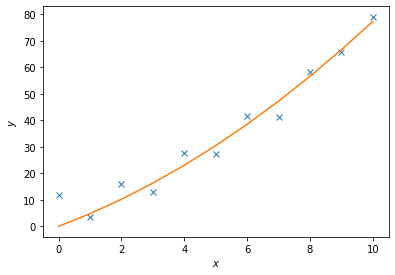

In [70]:
c1, c2 = 0.5, 2.0

x = np.arange(11)

y = c1*x**2 + c2*x

noise = y + 0.2 * np.max(y) * rnd.random(len(y))

A = np.c_[x**2,x]

c, resid, rank, sigma = linalg.lstsq(A, noise)

y2 = c[0]*x**2 + c[1]*x

fig = plt.figure()
ax = fig.add_axes([.1,.1,.8,.8])

ax.plot(x,noise,'x',x,y2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

plt.show()

## Singular Value Decomposition

Singular value decomposition is an extension of the eigenvalue, eigenvector problem to non-square matrices. The following matrices, and vector, are generated using `scipy.linalg.svd()`
$$ A = USv, $$
where $A$ is a non-square matrix, $U$ is a square matrix, $S$ is a diagonal matrix, and $v$ is a vector.

In [71]:
A = rnd.random((3,2))
print('A = ',A,'\n')

U, D, v = linalg.svd(A)

print('U = ',U,'\n')
print('Diagonal Elements = ',D,'\n')
print('v = ',v,'\n')

S = scipy.sparse.lil_matrix((3,2))
S[0,0] = D[0]
S[1,1] = D[1]

S = S.todense()
print('S = ', S, '\n')

print('A = ',U*S*v)

A =  [[0.27802483 0.07730829]
 [0.40778902 0.28641229]
 [0.37630991 0.45691064]] 

U =  [[-0.32224029  0.7448934   0.5842046 ]
 [-0.61281111  0.30623129 -0.72848125]
 [-0.72154261 -0.59275308  0.35779889]] 

Diagonal Elements =  [0.80891983 0.16620306] 

v =  [[-0.75534318 -0.65532944]
 [ 0.65532944 -0.75534318]] 

S =  [[0.80891983 0.        ]
 [0.         0.16620306]
 [0.         0.        ]] 

A =  [[0.27802483 0.07730829]
 [0.40778902 0.28641229]
 [0.37630991 0.45691064]]


## Schur Decomposition

The Schur Decomposition of $n\times n$ matrices gives said matices in the form
$$A = Z T Z^\dagger $$

Where $Z$ is a unitary matrix, and $T$ is an upper-triangular(or quasi-upper) matrix. We can request these matrices in a real or complex form using `scipy.linalg.schur(A)` and `scipy.linalg.schur(A,'complex')` or by using `scipy.linalg.rsf2csf(A)` for the complex form.

In [72]:
A = rnd.random((3,3))
print('A = ', A, '\n')

T, Z = linalg.schur(A)
Tc, Zc = linalg.schur(A, 'complex')

T, Z, Tc, Zc = map(np.matrix,(T,Z, Tc, Zc))

print('A = ',Z*T*Z.H, '\n')

print('A = ',Zc*Tc*Zc.H)

A =  [[0.55969869 0.98122334 0.22619461]
 [0.24530843 0.08993176 0.0456872 ]
 [0.56829763 0.60138912 0.74087103]] 

A =  [[0.55969869 0.98122334 0.22619461]
 [0.24530843 0.08993176 0.0456872 ]
 [0.56829763 0.60138912 0.74087103]] 

A =  [[0.55969869+0.j 0.98122334+0.j 0.22619461+0.j]
 [0.24530843+0.j 0.08993176+0.j 0.0456872 +0.j]
 [0.56829763+0.j 0.60138912+0.j 0.74087103+0.j]]


In [73]:
print('T = ',T)

T =  [[ 1.20294251  0.52355708 -0.74209033]
 [ 0.          0.40923817 -0.37762384]
 [ 0.          0.         -0.2216792 ]]


In [74]:
print('Z = ',Z)

Z =  [[ 0.52346561  0.78998514  0.31922913]
 [ 0.1498025   0.28349598 -0.94720074]
 [ 0.83877468 -0.54364834 -0.03005865]]
